In [1]:
import datetime
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from random import seed
from random import gauss
import random
from collections import Counter

In [2]:
# funções auxiliares

from math import log10, floor

def round_it(x, sig):
    return round(x, sig - int(floor(log10(abs(x)))) - 1)


# Tempo de queda da esfera

Expressão para o tempo de queda de uma altura de 1.5 m

In [3]:
g = 9.787899
h = 1.5
t = (2*h/g) **(0.5)
t

0.5536252478513619

Incerteza estimada

In [4]:
erro_h = 0.02
erro_t_prop = round_it(0.5*t*erro_h/h,1)
erro_t_crono = 0.01
erro_t_reacao = 2*0.25
erro_t_prop, erro_t_crono, erro_t_reacao

(0.004, 0.01, 0.5)

## Dados reais para o cálculo do desvio padrão 

In [5]:
tempos = pd.read_csv('tempos.csv')
tempos

,tempos
0,0.31
1,0.53
2,0.44
3,0.65
4,0.40
...,...
595,0.63
596,0.64
597,0.64
598,0.62


<Axes: ylabel='Count'>

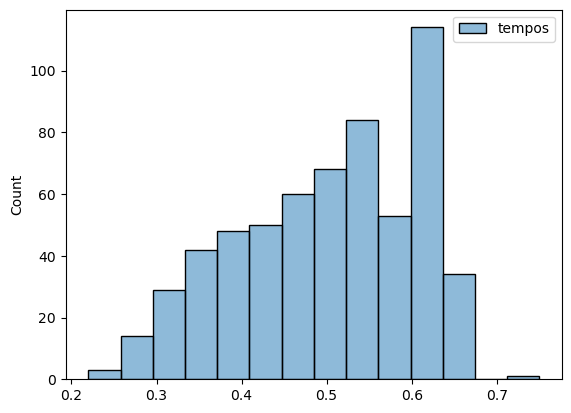

In [6]:
sns.histplot(tempos)

In [7]:
tempos.describe()

,tempos
count,600.000000
mean,0.503267
std,0.104925
min,0.220000
25%,0.430000
50%,0.520000
75%,0.590000
max,0.750000


In [8]:
desvio_padrao = tempos.std().item()
desvio_padrao

0.10492542333959805

## Simulação

In [9]:
def medidas(N_conj, N_medidas, h, desvio_padrao):
    t = (2*h/9.787899) **(0.5)
    medidas = pd.Series()
    estatistica = pd.DataFrame(columns = ['media', 'desvio', 'incerteza'])

    for i in range(N_conj):
        
        med = pd.Series([  round(gauss(t,desvio_padrao),2)   for i in range(N_medidas)])
        medidas = pd.concat([medidas, med])
        
        est = pd.DataFrame({'media':[medidas.mean()],'desvio':[medidas.std()], 'incerteza':[medidas.std()/((i+1)*N_medidas)**0.5]})
        estatistica = pd.concat([estatistica, est])
    
    return medidas, estatistica.reset_index()

### Primeiro conjunto de teste

In [10]:
n_conj = 100
n_medidas = 100 # por conjunto
h = 1.5
desvio_padrao = 0.1
m1, e1 = medidas(n_conj, n_medidas, h, desvio_padrao)

In [11]:
def plot_medias(estatistica, h):
    fig, ax = plt.subplots()

    t = (2*h/9.787899) **(0.5)

    # valor de referência
    ax.axhline(t,
    color='blue',
    linestyle='dashed',
    label='valor de referência'
    )
  

    # média e incerteza
    ax.errorbar(
        estatistica.index,
        estatistica['media'],
        yerr = estatistica['incerteza'],
        color='orange',
        marker='.',
        linestyle='none',
        #label=''
    )
    
    ax.set_title('Médias')
    ax.set_xlabel('conjuntos de medidas')
    ax.set_ylabel('tempo de queda (s)')
    ax.legend(loc='upper center', ncols=1)
    
    ax.text(
            0.5,
            0.5,
            "MP-resuldados",
            transform=ax.transAxes,
            fontsize=40,
            color="gray",
            alpha=0.1,
            ha="center",
            va="center",
            rotation=45,
        )
    
    return fig, ax

(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'Médias'}, xlabel='conjuntos de medidas', ylabel='tempo de queda (s)'>)

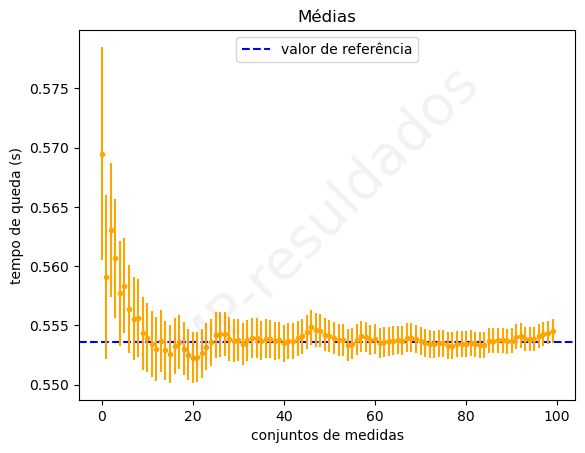

In [12]:
plot_medias(e1, 1.5)

### Histogramas

In [23]:
Counter(m1).most_common()


[(0.56, 444),
 (0.58, 407),
 (0.57, 397),
 (0.51, 387),
 (0.55, 382),
 (0.54, 382),
 (0.53, 376),
 (0.61, 369),
 (0.6, 364),
 (0.59, 343),
 (0.5, 340),
 (0.52, 330),
 (0.62, 315),
 (0.48, 314),
 (0.49, 313),
 (0.63, 306),
 (0.64, 273),
 (0.47, 271),
 (0.46, 255),
 (0.66, 253),
 (0.65, 242),
 (0.45, 217),
 (0.67, 212),
 (0.44, 205),
 (0.43, 203),
 (0.68, 186),
 (0.69, 179),
 (0.42, 173),
 (0.41, 132),
 (0.7, 124),
 (0.71, 122),
 (0.72, 109),
 (0.4, 108),
 (0.39, 106),
 (0.38, 89),
 (0.74, 73),
 (0.73, 68),
 (0.75, 59),
 (0.37, 58),
 (0.36, 58),
 (0.35, 52),
 (0.76, 44),
 (0.77, 41),
 (0.34, 39),
 (0.33, 36),
 (0.78, 32),
 (0.32, 29),
 (0.8, 25),
 (0.31, 22),
 (0.79, 19),
 (0.3, 16),
 (0.28, 16),
 (0.81, 12),
 (0.82, 11),
 (0.29, 8),
 (0.26, 8),
 (0.84, 7),
 (0.27, 7),
 (0.25, 7),
 (0.87, 4),
 (0.83, 4),
 (0.86, 3),
 (0.23, 3),
 (0.85, 3),
 (0.2, 2),
 (0.89, 2),
 (0.94, 1),
 (0.18, 1),
 (0.24, 1),
 (0.91, 1)]

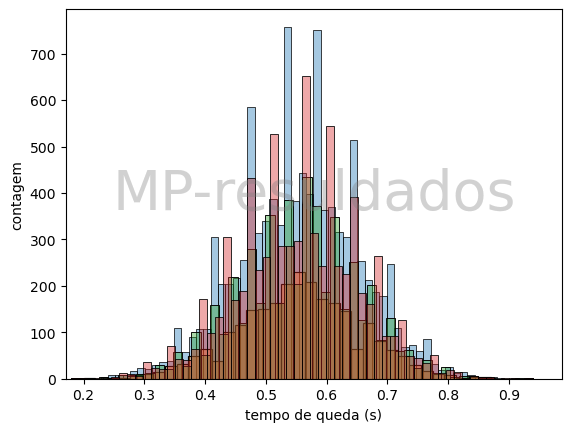

In [14]:
fig, ax = plt.subplots()
for a in [m1,
          m1[:int(n_conj*n_medidas/4)],
          m1[:int(n_conj*n_medidas/2)],
          m1[:3*int(n_conj*n_medidas/4)],
          ]:      
    sns.histplot(a, alpha=0.4)
    
    ax.set_xlabel('tempo de queda (s)')
    ax.set_ylabel('contagem')
    ax.set_xlim(0.95*m1.min(),1.05*m1.max())
   # ax.set_ylim(0,1.05*frequencias[0][1])
    
    ax.text(
            0.5,
            0.5,
            "MP-resuldados",
            transform=ax.transAxes,
            fontsize=40,
            color="gray",
            alpha=0.1,
            ha="center",
            va="center",
            rotation=0,
        )
    

In [ ]:
m1
m1[:int(n_conj*n_medidas/4)
m1[:int(n_conj*n_medidas/2)
m1[:3*int(n_conj*n_medidas/4)

Text(0.5, 0.5, 'MP-resuldados')

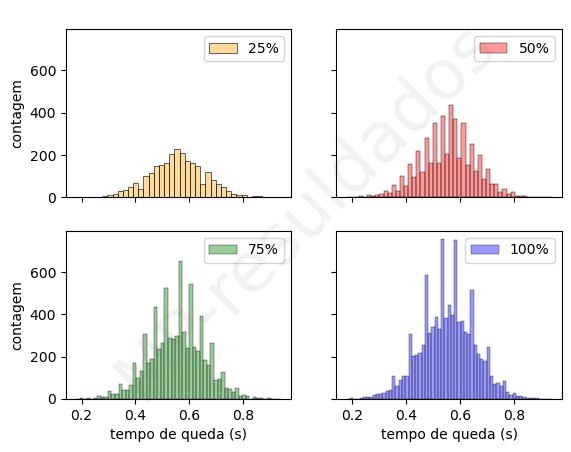

In [44]:
fig, axs_arr = plt.subplots(2, 2, sharex=True, sharey=True)

axs = [ax for axs in axs_arr for ax in axs]
fracs = [.25, .50, .75, 1]
colors = ['orange', 'r', 'g', 'b']

for ax, frac, color in zip(axs, fracs, colors):
    
    a = m1[:int(frac*n_conj*n_medidas)]
    
    sns.histplot(a, alpha=0.4, ax=ax, label=f'{int(100*frac)}%', color=color)

    ax.set_xlabel('tempo de queda (s)')
    ax.set_ylabel('contagem')
    ax.legend(loc='upper right')
    
fig.text(
        0.5,
        0.5,
        "MP-resuldados",
        fontsize=50,
        color="gray",
        alpha=0.1,
        ha="center",
        va="center",
        rotation=45,
)

### Comparação do desvio padrão com a resolução do cronômetro

In [28]:
dir(fig)

['_PROPERTIES_EXCLUDED_FROM_SET',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_axes_internal',
 '_agg_filter',
 '_align_label_groups',
 '_alpha',
 '_animated',
 '_axobservers',
 '_axstack',
 '_button_pick_id',
 '_callbacks',
 '_canvas_callbacks',
 '_check_layout_engines_compat',
 '_clipon',
 '_clippath',
 '_cm_set',
 '_default_contains',
 '_dpi',
 '_fig_callbacks',
 '_fully_clipped_to_axes',
 '_gci',
 '_get_dpi',
 '_get_draw_artists',
 '_get_renderer',
 '_gid',
 '_in_layout',
 '_internal_update',
 '_label',
 '_layout_engine',
 '_localaxes',
 '_mouse_key_ids',
 '_mouseover',
 '_norm_per_subplot_kw',
 '_normalize_grid_string',
 

In [17]:
def plot_desvio(medidas, estatistica):
    fig, ax = plt.subplots()

    # resolução do cronômetro
    ax.axhline(0.01,
    color='blue',
    linestyle='dashed',
    label='resolução do cronômetro'
    )

    # desvio para diversos conjuntos com quantidade de medidas diferentes
    ax.plot(
        estatistica.index,
        estatistica['incerteza'],
        color='orange',
        marker='.',
        linestyle='none',
        #label=''
    )


    ax.set_title('Incerteza do valor médio')
    ax.set_xlabel('conjuntos de medidas')
    ax.set_ylabel('tempo de queda (s)')
    ax.legend(loc='upper center', ncols=1)
    
    ax.text(
            0.5,
            0.5,
            "MP-resuldados",
            transform=ax.transAxes,
            fontsize=40,
            color="gray",
            alpha=0.1,
            ha="center",
            va="center",
            rotation=45,
            )
    
    
    return fig, ax

(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'Incerteza do valor médio'}, xlabel='conjuntos de medidas', ylabel='tempo de queda (s)'>)

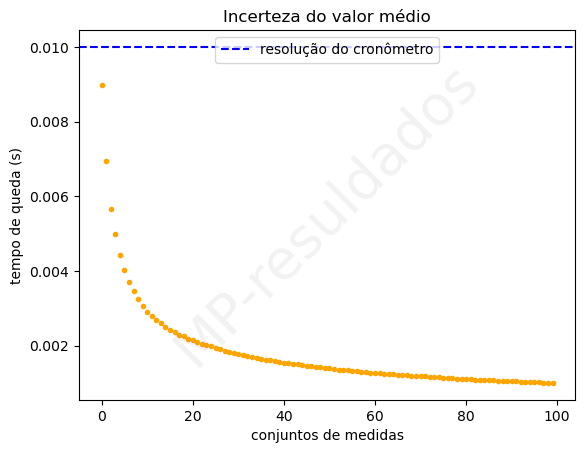

In [18]:
plot_desvio(m1, e1)